# HW05: Practice with algorithm selection, assessment, hyperparameter tuning, multiclass and one-class classification, and imbalanced data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import mixture

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

## 1. Algorithm selection for multiclass classification by optical recognition of handwritten digits

The [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset
  has 1797 labeled images of hand-written digits.
  - $X$ = `digits.data` has shape (1797, 64).
    - Each image $\mathbf{x}_i$ is represented as the $i$th row of 64 pixel values in the 2D
      `digits.data` array that corresponds to an 8x8 photo of a handwritten digit.
  - $y$ = `digits.target` has shape (1797,). Each $y_i$ is a number from 0 to 9 indicating
    the handwritten digit that was photographed and stored in $\mathbf{x}_i$.



### 1(a) Load the digits dataset and split it into training, validation, and test sets as I did in the lecture example code [07ensemble.html](https://pages.stat.wisc.edu/~jgillett/451/burkov/07/07ensemble.html).
This step does not need to display any output.

In [2]:
# ... your code here ...
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)

## 1(b) Use algorithm selection on training and validation data to choose a best classifier.
Loop through these four classifiers and corresponding parameters, doing a grid search
to find the best hyperparameter setting. Use only the training data for the grid search.
- SVM:
  - Try all values of `kernel` in 'linear', 'rbf'.
  - Try all values of `C` in 0.01, 1, 100.
- logistic regression:
  - Use `max_iter=5000` to avoid a nonconvergence warning.
  - Try all values of `C` in 0.01, 1, 100.
- ID3 decision tree:
  - Use `criterion='entropy` to get our ID3 tree.
  - Try all values of `max_depth` in 1, 3, 5, 7.
- kNN:
  - (Use the default Euclidean distance).
  - Try all values of `n_neighbors` in 1, 2, 3, 4.

Hint:
- Make a list of the four classifiers without setting any hyperparameters.
- Make a list of four corresponding parameter dictionaries.
- Loop through 0, 1, 2, 3:
  - Run grid search on the $i$th classifier with the $i$th parameter dictionary on the
    training data. (The grid search does its own cross-validation using the training data.)
  - Use the $i$th classifier with its best hyperparameter settings (just `clf` from
    `clf = GridSearchCV(...)`) to find the accuracy of the model on the validation data, i.e.
    find `clf.score(X_valid, y_valid)`.
- Keep track, as your loop progresses, of:
  - the index $i$ of the best classifier (initialize it to `-1` or some other value)
  - the best accuracy score on validation data (initialize it to `-np.Inf`)
  - the best classifier with its hyperparameter settings, that is the best `clf` from
    `clf = GridSearchCV(...)` (initialize it to `None` or some other value)

I needed about 30 lines of code to do this. It took a minute to run.

In [3]:
classifiers = [
    svm.SVC(),
    linear_model.LogisticRegression(max_iter=5000),
    DecisionTreeClassifier(criterion='entropy'),
    KNeighborsClassifier()
]

param_grids = [
    {'kernel': ['linear', 'rbf'], 'C': [0.01, 1, 100]},
    {'C': [0.01, 1, 100]},
    {'max_depth': [1, 3, 5, 7]},
    {'n_neighbors': [1, 2, 3, 4]}
]

best_index = -1
best_score = -np.Inf
best_clf = None

for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grids[i])
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    
    print(clf, score)
    if score > best_score:
        best_index = i
        best_score = score
        best_clf = clf



GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'kernel': ['linear', 'rbf']}) 0.9888888888888889
GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 1, 100]}) 0.9722222222222222
GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 3, 5, 7]}) 0.8555555555555555
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4]}) 0.9888888888888889


### 1(c) Use the test data to evaluate your already-fit best classifier and its hyperparameter settings from 1(b).
- Well, there are two tied for 'best'. Please use the first of these two.
- Report the result of calling `.score(X_test, y_test)` on your best classifier/hyperparameters.
- Show a confusion matrix from the true `y_test` values and the corresponding $\hat{y}$ values
  predicted by your best classifier/hyperparameters on `X_test`.
- For each of the wrong predictions (where `y_test` and your $\hat{y}$ values disagree), show:
  - The index $i$ in the test data of that example $\mathbf{x}$
  - The correct label $y_i$
  - Your incorrect prediction $\hat{y}_i$
  - A plot of that image (to see whether the confusion was reasonable)

Test accuracy: 0.9777777777777777
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  1  0  0]
 [ 0  0  0  0 17  0  0  0  1  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  1  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  1  0  0  0 17]]
Index: 61, True label: 9, Predicted: 5


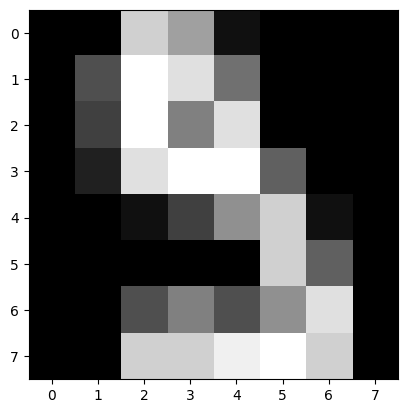

Index: 65, True label: 4, Predicted: 8


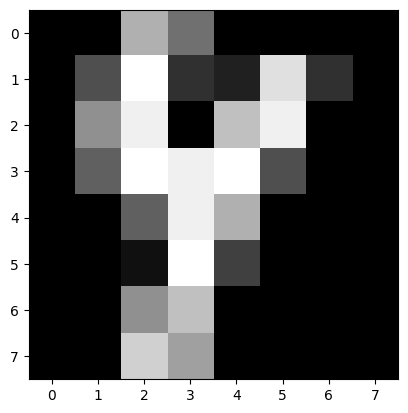

Index: 152, True label: 8, Predicted: 1


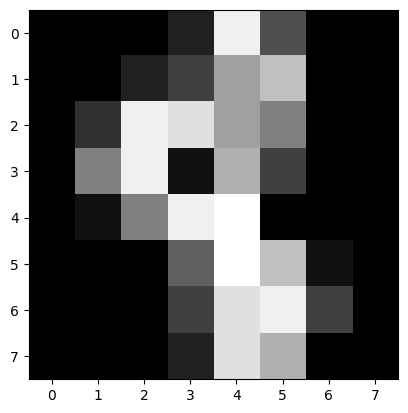

Index: 177, True label: 3, Predicted: 7


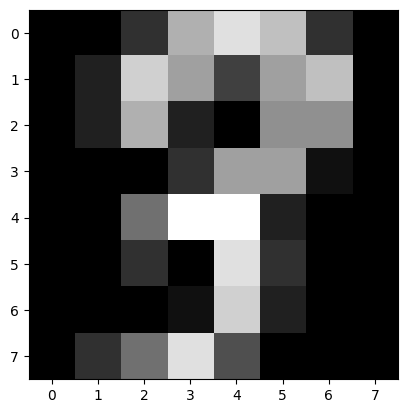

In [4]:
test_score = best_clf.score(X_test, y_test)
y_pred = best_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test accuracy:", test_score)
print("Confusion Matrix:\n", conf_matrix)

misclassified_indices = np.where(y_test != y_pred)[0]

for index in misclassified_indices:
    print(f"Index: {index}, True label: {y_test[index]}, Predicted: {y_pred[index]}")
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    plt.show()

## 2. One-class classification (outlier detection)

### 2(a) There is an old gradebook at [http://pages.stat.wisc.edu/~jgillett/451/data/midtermGrades.txt](http://pages.stat.wisc.edu/~jgillett/451/data/midtermGrades.txt).
Use `pd.read_table()` to read it into a DataFrame.

Hint: `pd.read_table()` has many parameters. Check its documentation to find three parameters to:
- Read from the given URL
- Use the separator '\s+', which means 'one or more whitespace characters'
- Skip the first 12 rows, as they are a note to students and not part of the gradebook

In [14]:
url = "midtermGrades.txt"
gradebook = pd.read_table(url, sep='\s+', skiprows=12)

### 2(b) Use `clf = mixture.GaussianMixture(n_components=1)` to make a one-class Gaussian model to decide which $\mathbf{x}=(\text{Exam1}, \text{Exam2})$ are outliers:

- Set a matrix X to the first two columns, Exam1 and Exam.
- These exams were worth 125 points each. Transform scores to percentages in $[0, 100]$.

  Hint: I tried the MinMaxScaler() first, but it does the wrong thing if there aren't scores
  of 0 and 125 in each column. So, instead, I just multiplied the whole matrix by 100 / 125.
- Fit your classifier to X.
  
  Hint:
  - The reference page for `mixture.GaussianMixture` includes a `fit(X, y=None)` method
    with the comment that y is ignored (as this is an unsupervised learning algorithm--there
    is no $y$) but present for API consistency. So we can fit with just X.
  - I got a warning about "KMeans ... memory leak". You may ignore this
    warning if you see it. I still got satisfactory results.
- Print the center $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$ from the two-variable
  $N_2(\mathbf{\mu}, \mathbf{\Sigma})$ distribution you estimated.

In [15]:
# ... your code here ...
X = gradebook.iloc[:, :2] * (100 / 125)

clf = mixture.GaussianMixture(n_components=1)
clf.fit(X)

print("Center (μ):", clf.means_)
print("Covariance Matrix (Σ):", clf.covariances_)

Center (μ): [[82.81329923 71.01176471]]
Covariance Matrix (Σ): [[[155.51123078  73.02961336]
  [ 73.02961336 180.87014392]]]


### 2(c) Here I have given you code to make a contour plot of the negative log likelihood $-\ln f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$ for $\mathbf{X} \sim N_2(\mathbf{\mu}, \mathbf{\Sigma})$, provided you have set `clf`.

```
# make contour plot of log-likelihood of samples from clf.score_samples()
margin = 10
x = np.linspace(0 - margin, 100 + margin)
y = np.linspace(0 - margin, 100 + margin)
grid_x, grid_y = np.meshgrid(x, y)
two_column_grid_x_grid_y = np.array([grid_x.ravel(), grid_y.ravel()]).T
negative_log_pdf_values = -clf.score_samples(two_column_grid_x_grid_y)
grid_z = negative_log_pdf_values
grid_z = grid_z.reshape(grid_x.shape)
plt.contour(grid_x, grid_y, grid_z, levels=10) # X, Y, Z
plt.title('(Exam1, Exam2) pairs')
```

Paste my code into your code cell below and add more code:
- Add black $x$- and $y$- axes. Label them Exam1 and Exam2.
- Plot the data points in blue.
- Plot $\mathbf{\mu}=$ `clf.means_` as a big lime dot.
- Overplot (i.e. plot again) in red the 8 outliers determined by a threshold consisting
  of the 0.02 quantile of the pdf values $f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$
  for each $\mathbf{x}$ in X.
  
  Hint: `clf.score_samples(X)` gives log likelihood, so `np.exp(clf.score_samples(X))`
  gives the required $f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$ values.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


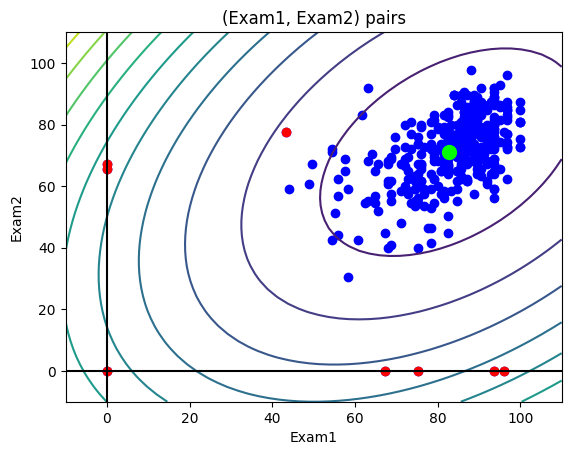

In [16]:
margin = 10
x = np.linspace(0 - margin, 100 + margin)
y = np.linspace(0 - margin, 100 + margin)
grid_x, grid_y = np.meshgrid(x, y)
two_column_grid_x_grid_y = np.array([grid_x.ravel(), grid_y.ravel()]).T
negative_log_pdf_values = -clf.score_samples(two_column_grid_x_grid_y)
grid_z = negative_log_pdf_values
grid_z = grid_z.reshape(grid_x.shape)

plt.contour(grid_x, grid_y, grid_z, levels=10)  # X, Y, Z
plt.title('(Exam1, Exam2) pairs')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color='blue')
plt.plot(clf.means_[0][0], clf.means_[0][1], 'o', color='lime', markersize=10)


pdf_values = np.exp(clf.score_samples(X))
threshold = np.quantile(pdf_values, 0.02)
outliers = X[pdf_values < threshold]
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], color='red')

plt.show()

### What characterizes 7 of these 8 outliers? Write your answer in a markdown cell.

One of the exams has a score of 0.

### 2(d) Write a little code to report whether, by the 0.02 quantile criterion, $\mathbf{x}=$ (Exam1=50, Exam2=100) is an outlier.

Hint: Compare $f_{\mathbf{\mu}, \mathbf{\Sigma}}(\mathbf{x})$ to your threshold

In [17]:
point = np.array([[50, 100]])
pdf_value = np.exp(clf.score_samples(point))
is_outlier = pdf_value < threshold

print(is_outlier[0])

print(pdf_value)
print(threshold)

True
[3.97398057e-08]
5.929778534329709e-06


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


## 3. Explore the fact that accuracy can be misleading for imbalanced data.
Here I make a fake imbalanced data set by randomly sampling $y$ from a distribution with $P(y = 0) = 0.980$ and $P(y = 1) = 0.020$.

In [9]:
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, weights=[0.980, 0.020],
                           n_clusters_per_class=1, flip_y=0.01, random_state=0)
print(f'np.bincount(y)={np.bincount(y)}; we expect about 980 zeros and 20 ones.')
print(f'np.mean(y)={np.mean(y)}; we expect the proportion of ones to be about 0.020.')

np.bincount(y)=[973  27]; we expect about 980 zeros and 20 ones.
np.mean(y)=0.027; we expect the proportion of ones to be about 0.020.


Here I split the data into 50% training and 50% testing data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0, stratify=y)
print(f'np.bincount(y_train)={np.bincount(y_train)}')
print(f'np.mean(y_train)={np.mean(y_train)}.')
print(f'np.bincount(y_test)={np.bincount(y_test)}.')
print(f'np.mean(y_test)={np.mean(y_test)}.')

np.bincount(y_train)=[486  14]
np.mean(y_train)=0.028.
np.bincount(y_test)=[487  13].
np.mean(y_test)=0.026.


### 3a. Train and assess a gradient boosting model.
- Train on the training data.
- Use 100 trees of maximum depth 1 and learning rate $\alpha = 0.25$.
- Use `random_state=0` (to give us all a chance of getting the same results).
- Display the accuracy, precision, recall, and AUC on the test data. Use 3 decimal places.
  Use a labeled print statement with 3 decimal places so the reader can easily find each metric.
- Make an ROC curve from your classifier and the test data.

Accuracy: 0.982
Precision: 0.700
Recall: 0.538
AUC: 0.769


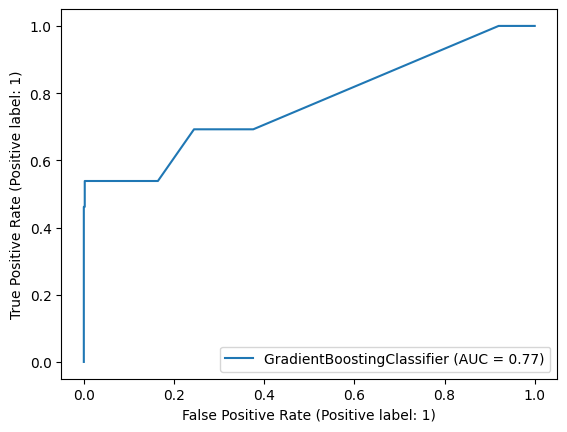

In [11]:
# ... your code here ...
clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=0.25, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"AUC: {auc:.3f}")

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

Note the high accuracy but lousy precision, recall, and AUC.

Note that since the data have about 98% $y = 0$, we could get about 98% accuracy
by just always predicting $\hat{y} = 0$. High accuracy alone is not necessarily helpful.

### 3b. Now oversample the data to get a balanced data set.
- Use the `RandomOverSampler(random_state=0)` to oversample and get a balanced data set.
- Repeat my `train_test_split()` block from above.
- Repeat your train/assess block from above.

Resampled Accuracy: 0.957
Resampled Precision: 0.970
Resampled Recall: 0.942
Resampled AUC: 0.993


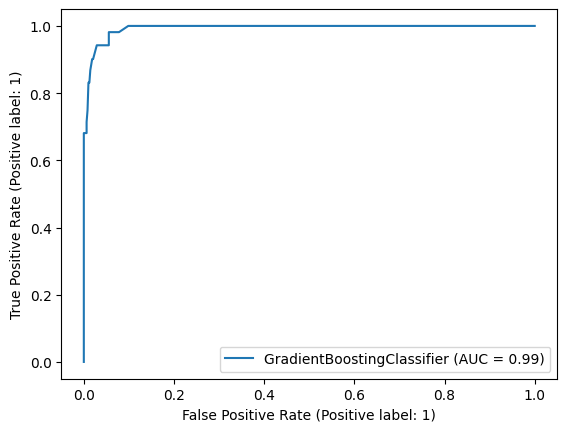

In [12]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.5, random_state=0, stratify=y_resampled)

clf_resampled = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=0.25, random_state=0)
clf_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = clf_resampled.predict(X_test_resampled)

accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
precision_resampled = precision_score(y_test_resampled, y_pred_resampled)
recall_resampled = recall_score(y_test_resampled, y_pred_resampled)
auc_resampled = roc_auc_score(y_test_resampled, clf_resampled.predict_proba(X_test_resampled)[:, 1])

print(f"Resampled Accuracy: {accuracy_resampled:.3f}")
print(f"Resampled Precision: {precision_resampled:.3f}")
print(f"Resampled Recall: {recall_resampled:.3f}")
print(f"Resampled AUC: {auc_resampled:.3f}")

RocCurveDisplay.from_estimator(clf_resampled, X_test_resampled, y_test_resampled)
plt.show()


Note that we traded a little accuracy for much improved precision, recall, and AUC.

If you do classification in your project and report accuracy, please
also report the proportions of $y = 0$ and $y = 1$ in your test data so that
we get insight into whether your model improves upon always guessing $\hat{y} = 0$
or always guessing $\hat{y} = 1$.